<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [34]:
import pandas as pd 
import numpy as np

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [35]:
url = 'C:\\Users\\chris\\Desktop\\home\\chris\\Project\\Data Science\\data\\yellow_tripdata_2024-01.parquet'
taxi_df =pd.read_parquet(url, engine='pyarrow')
taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [36]:
print(taxi_df.shape)
taxi_df.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [37]:
#check data types
taxi_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [38]:
#longest trip
taxi_df['trip_duration'] = taxi_df.tpep_dropoff_datetime - taxi_df.tpep_pickup_datetime
taxi_df['trip_duration'].describe()

count                   2964624
mean     0 days 00:15:36.777037
std      0 days 00:34:51.063215
min           -1 days +23:46:26
25%             0 days 00:07:09
50%             0 days 00:11:38
75%             0 days 00:18:41
max             6 days 13:35:24
Name: trip_duration, dtype: object

In [39]:
zero_duration = pd.Timedelta(0)

taxi_df.loc[taxi_df.trip_duration < zero_duration].head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
87994,1,2024-01-02 10:00:00,2024-01-02 09:53:56,1.0,7.2,99.0,N,75,95,1,38.5,0.0,0.5,0.0,6.94,1.0,46.94,0.0,0.0,-1 days +23:53:56
253075,1,2024-01-04 12:30:00,2024-01-04 12:18:23,1.0,4.8,99.0,N,165,222,1,31.5,0.0,0.5,0.0,0.00,1.0,33.00,0.0,0.0,-1 days +23:48:23
264032,1,2024-01-04 14:00:00,2024-01-04 13:55:50,1.0,5.6,99.0,N,95,80,1,27.5,0.0,0.5,0.0,0.00,1.0,29.00,0.0,0.0,-1 days +23:55:50
349095,1,2024-01-05 11:00:00,2024-01-05 10:57:16,1.0,0.6,99.0,N,133,89,1,15.5,0.0,0.5,0.0,0.00,1.0,17.00,0.0,0.0,-1 days +23:57:16
1436547,1,2024-01-17 14:25:00,2024-01-17 14:11:26,1.0,5.4,99.0,N,179,47,1,29.5,0.0,0.5,0.0,0.00,1.0,31.00,0.0,0.0,-1 days +23:46:26


In [40]:
# There are 56 trips with negative duration
num_invalid_duration = (taxi_df.trip_duration < zero_duration).sum()
num_invalid_duration

56

In [41]:
# We don't need all of the columns
taxi_df = taxi_df[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
                   'RatecodeID', 'PULocationID','DOLocationID','payment_type','total_amount']]
taxi_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10
...,...,...,...,...,...,...,...,...,...
2964619,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,107,263,0,21.77
2964620,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,114,236,0,25.74
2964621,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,211,25,0,23.97
2964622,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,107,13,0,33.46


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

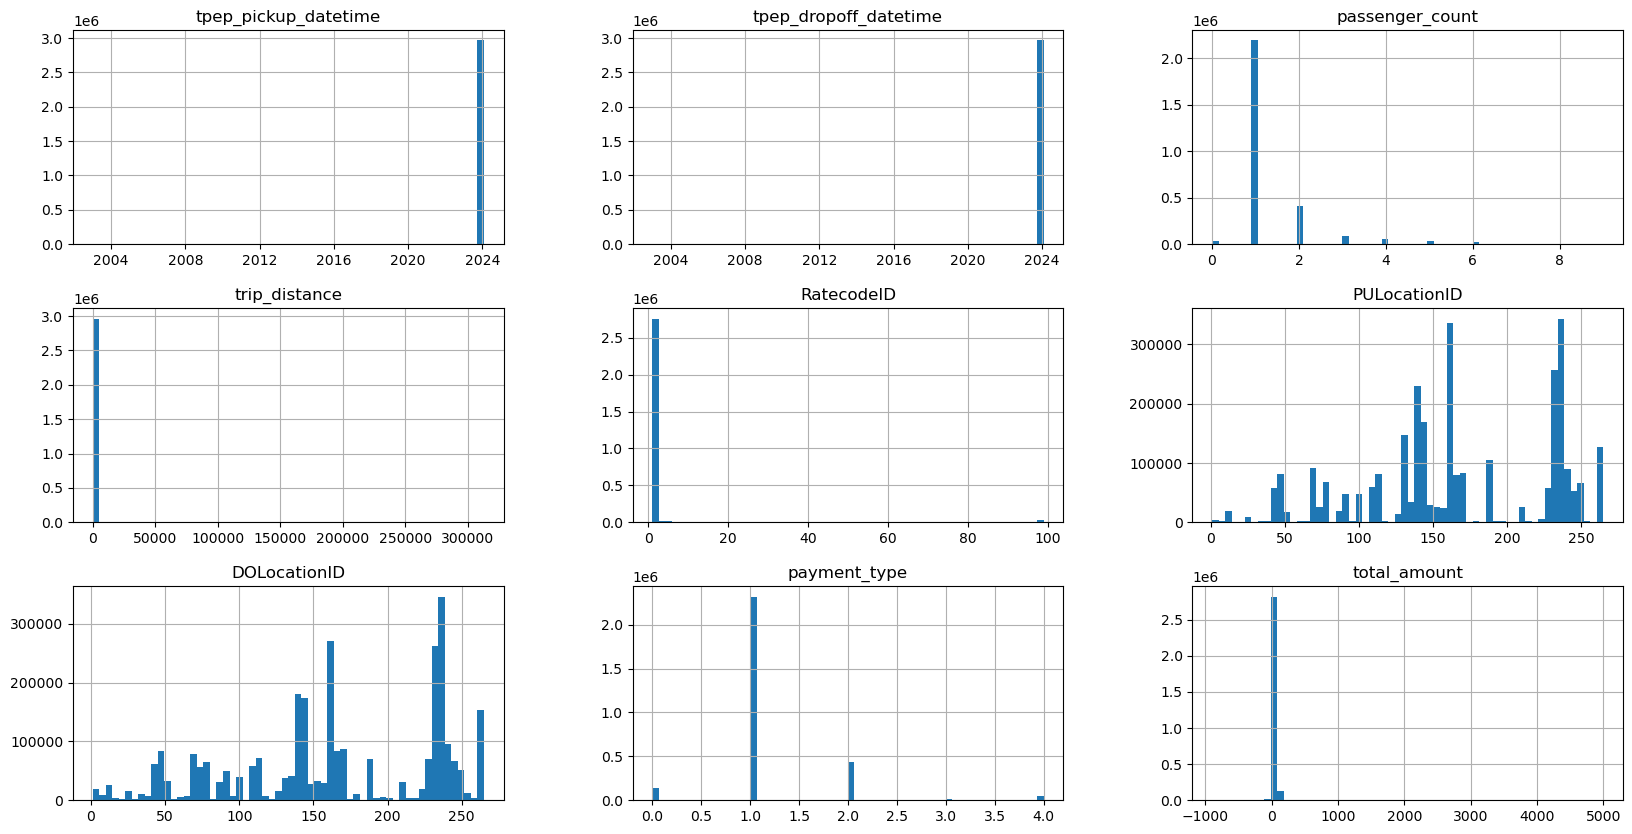

In [42]:
taxi_df.hist(figsize=(20,10), bins=60)

<Axes: xlabel='index', ylabel='total_amount'>

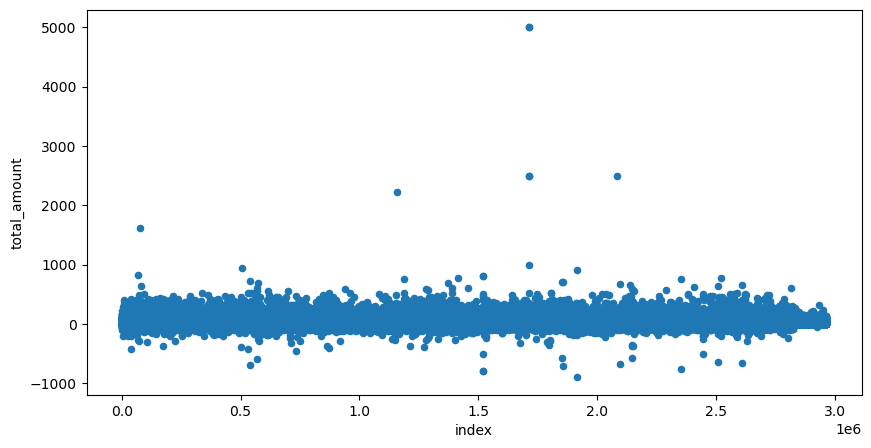

In [43]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

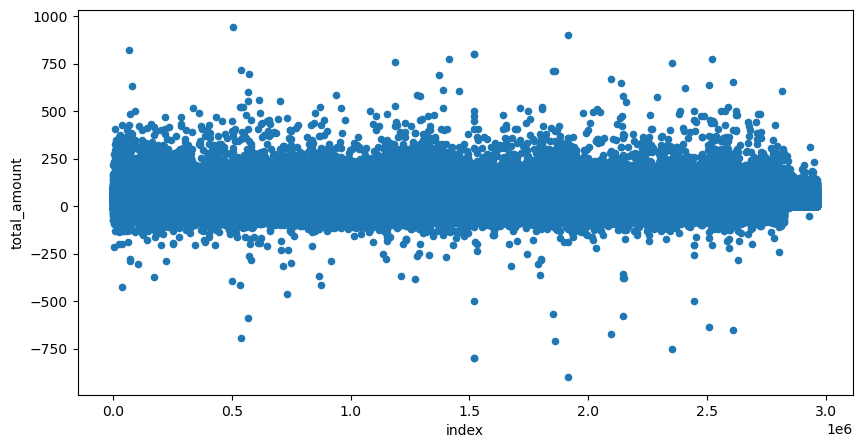

In [44]:
taxi_df[taxi_df.total_amount < 1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

there are three things to deal with:
1) negative duration for taxi trips
2) really high values for trips
3) negative values for trips

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [45]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[us](2), float64(4), int32(2), int64(1)
memory usage: 180.9 MB


In [46]:
taxi_df_cl = taxi_df.copy()

In [47]:
#getting rid off rows with total_price over 300 or less than 1 
taxi_df_cl = taxi_df_cl.loc[(taxi_df_cl['total_amount'] < 300) & (taxi_df_cl['total_amount'] > 1)] 


In [48]:
taxi_df_cl.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [49]:
#getting rid off rows with negative duration
taxi_df_cl = taxi_df_cl.loc[taxi_df_cl.tpep_dropoff_datetime - taxi_df_cl.tpep_pickup_datetime  > zero_duration] 
taxi_df_cl.shape

(2926804, 9)

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [76]:
taxi_df_pr = taxi_df_cl.copy()
taxi_df_pr.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [77]:
#check column types
taxi_df_pr.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [78]:
#convert ID and Payment type to str
columns_to_convert = {'RatecodeID': 'str',
                      'PULocationID': 'str',
                      'DOLocationID': 'str',
                      'payment_type': 'str'}
taxi_df_pr = taxi_df_pr.astype(columns_to_convert)
taxi_df_pr.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [79]:
#add more datetime columns for visibility
taxi_df_pr['transaction_date'] = pd.to_datetime(taxi_df_pr.tpep_pickup_datetime.dt.date)
taxi_df_pr['transaction_year'] = taxi_df_pr.tpep_pickup_datetime.dt.year
taxi_df_pr['transaction_month'] = taxi_df_pr.tpep_pickup_datetime.dt.month
taxi_df_pr['transaction_day'] = taxi_df_pr.tpep_pickup_datetime.dt.day
taxi_df_pr['transaction_hour'] = taxi_df_pr.tpep_pickup_datetime.dt.hour
taxi_df_pr.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

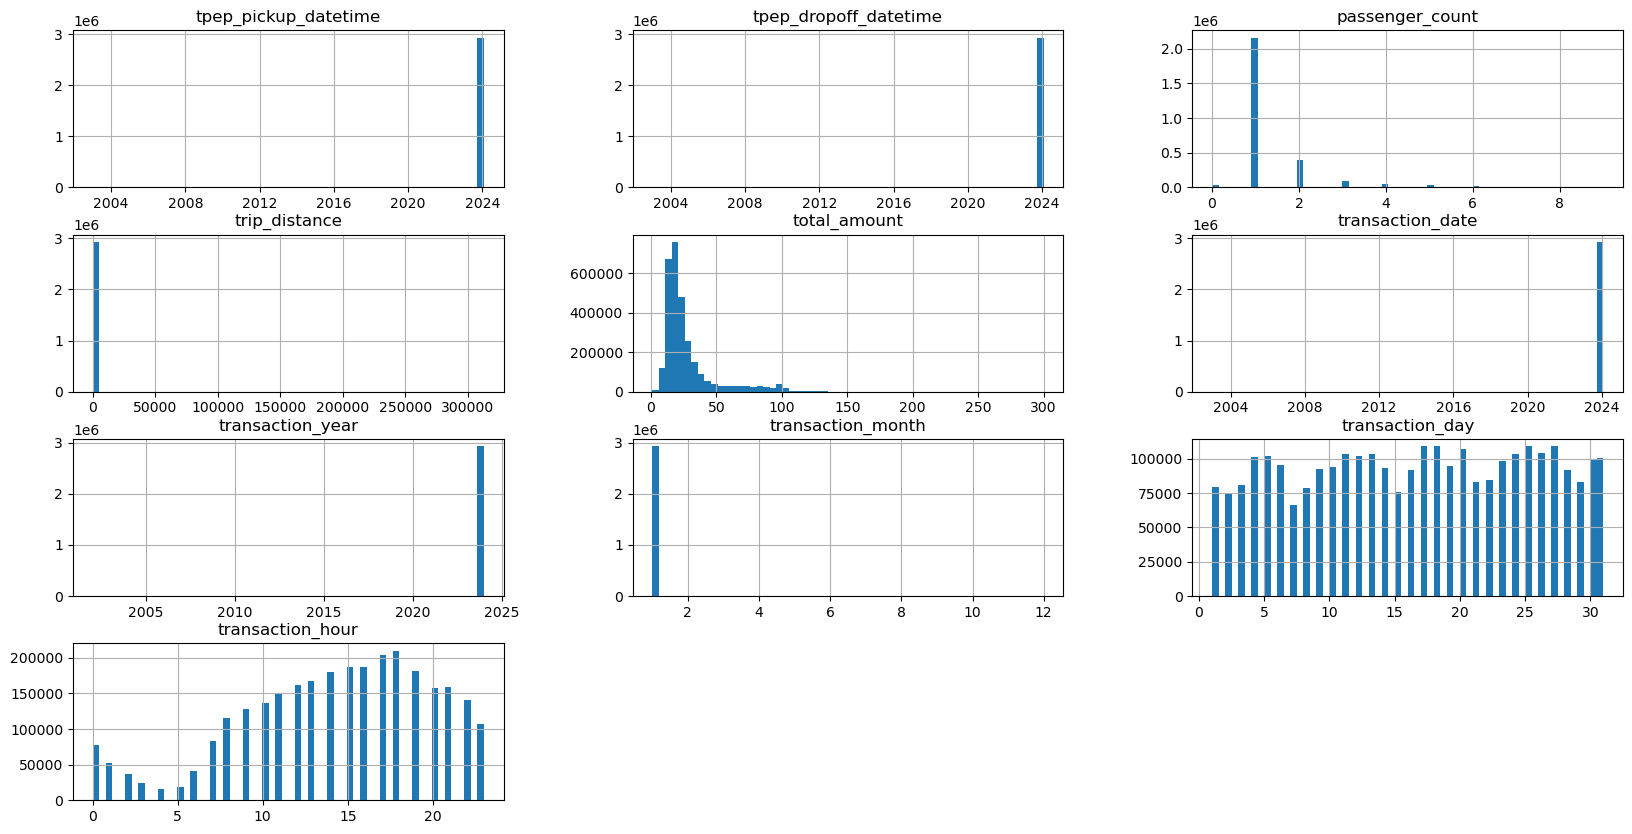

In [80]:
taxi_df_pr.hist(figsize=(20,10), bins=60)

In [81]:
print(taxi_df_pr.transaction_year.value_counts())
taxi_df_pr.transaction_month.value_counts()

transaction_year
2024    2926790
2023         10
2009          3
2002          1
Name: count, dtype: int64


transaction_month
1     2926790
12         11
2           3
Name: count, dtype: int64

In [82]:
#get rid off rows that are not within 2024-01
taxi_df_pr = taxi_df_pr[(taxi_df_pr.transaction_year == 2024) & (taxi_df_pr.transaction_month == 1)]

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

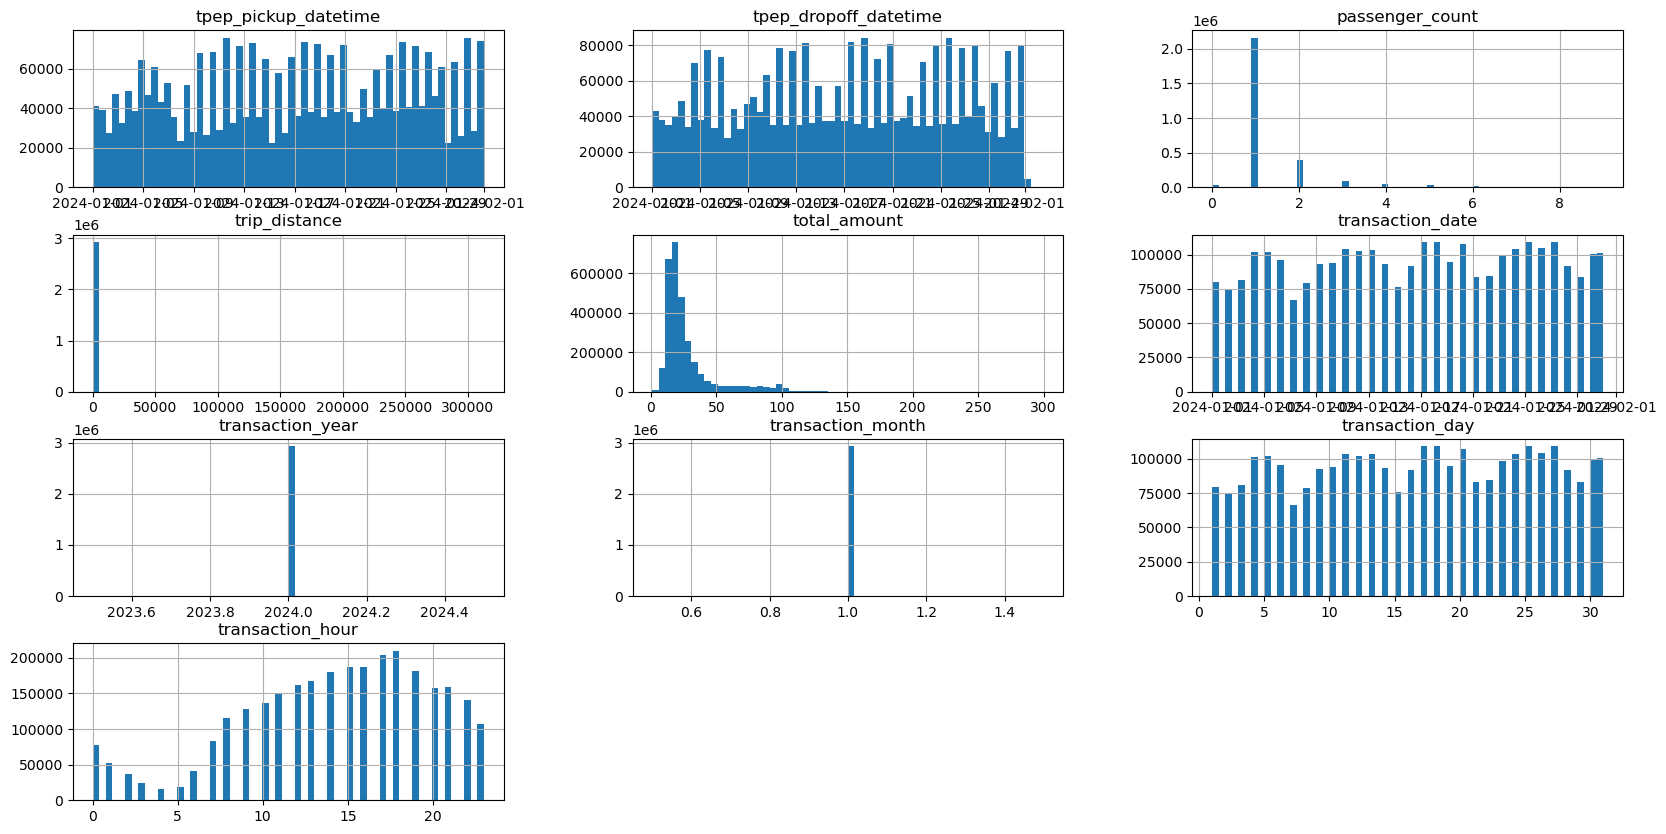

In [83]:
taxi_df_pr.hist(figsize=(20,10), bins=60)

In [87]:
categorical_columns = ['PULocationID','transaction_date','transaction_month',
                       'transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [89]:
main_taxi_df = taxi_df_pr[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2926787, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

## 7.1. Decision tree <a id='decision_tree'></a>

## 7.2. Random forest <a id='random_forest'></a>

## 7.3. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)